### Importing necessary packages

In [68]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import sklearn
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import confusion_matrix, roc_auc_score
import plotly.graph_objects as go

In [2]:
print(os.listdir("CovidXRayImages/Val/")) #Checking the folders

['COVID-19', 'Non-COVID', 'Normal']


In [3]:
#Accessing each images from the different folders
#Here we are taking only the lung mask images
infected_covid = os.listdir('CovidXRayImages/val/COVID-19/lung masks/') #For the covid 19 infected imagfes
non_covid= os.listdir('CovidXRayImages/Val/Non-COVID/lung masks/')# For the non-covid images
normal = os.listdir('CovidXRayImages/Val/Normal/lung masks/')# For the normal images

In [4]:
#Checking the channel of the image

# Read the image
image = cv2.imread('CovidXRayImages/val/COVID-19/images/covid_1021.png', cv2.IMREAD_UNCHANGED)

# Check the number of channels
num_channels = image.shape[2] if len(image.shape) == 3 else 1

# Determine if the image is RGB or grayscale
if num_channels == 3:
    print("Image is RGB with channel 3")
elif num_channels == 1:
    print("Image is grayscale with channel 1")
else:
    print("Image has an unsupported number of channels")


Image is grayscale with channel 1


In [5]:
#Checking the channel of the image

# Read the image
image = cv2.imread('CovidXRayImages/val/COVID-19/lung masks/covid_1021.png', cv2.IMREAD_UNCHANGED)

# Check the number of channels
num_channels = image.shape[2] if len(image.shape) == 3 else 1

# Determine if the image is RGB or grayscale
if num_channels == 3:
    print("Image is RGB with channel 3")
elif num_channels == 1:
    print("Image is grayscale with channel 1")
else:
    print("Image has an unsupported number of channels")


Image is grayscale with channel 1


In [6]:
infected_covid

['covid_1021.png',
 'covid_1027.png',
 'covid_1031.png',
 'covid_1034.png',
 'covid_1038.png',
 'covid_1042.png',
 'covid_1048.png',
 'covid_1050.png',
 'covid_1056.png',
 'covid_1064.png',
 'covid_1079.png',
 'covid_1080.png',
 'covid_1082.png',
 'covid_1086.png',
 'covid_1089.png',
 'covid_1099.png',
 'covid_1105.png',
 'covid_1108.png',
 'covid_1111.png',
 'covid_1116.png',
 'covid_1117.png',
 'covid_1123.png',
 'covid_1124.png',
 'covid_1132.png',
 'covid_1135.png',
 'covid_1139.png',
 'covid_1141.png',
 'covid_1144.png',
 'covid_1151.png',
 'covid_1152.png',
 'covid_1161.png',
 'covid_1173.png',
 'covid_1186.png',
 'covid_1191.png',
 'covid_1193.png',
 'covid_1195.png',
 'covid_1199.png',
 'covid_1227.png',
 'covid_1230.png',
 'covid_1237.png',
 'covid_1242.png',
 'covid_1245.png',
 'covid_1256.png',
 'covid_1263.png',
 'covid_1268.png',
 'covid_1273.png',
 'covid_1278.png',
 'covid_1280.png',
 'covid_1282.png',
 'covid_1283.png',
 'covid_1286.png',
 'covid_1287.png',
 'covid_1293

In [7]:
len(infected_covid)

1903

In [197]:
non_covid

['non_COVID (10606).png',
 'non_COVID (10607).png',
 'non_COVID (10608).png',
 'non_COVID (10609).png',
 'non_COVID (10610).png',
 'non_COVID (10611).png',
 'non_COVID (10612).png',
 'non_COVID (10613).png',
 'non_COVID (10614).png',
 'non_COVID (10616).png',
 'non_COVID (10617).png',
 'non_COVID (10618).png',
 'non_COVID (10619).png',
 'non_COVID (10620).png',
 'non_COVID (10621).png',
 'non_COVID (10622).png',
 'non_COVID (10623).png',
 'non_COVID (10624).png',
 'non_COVID (10625).png',
 'non_COVID (10626).png',
 'non_COVID (10627).png',
 'non_COVID (10628).png',
 'non_COVID (10629).png',
 'non_COVID (10630).png',
 'non_COVID (10631).png',
 'non_COVID (10632).png',
 'non_COVID (10633).png',
 'non_COVID (10634).png',
 'non_COVID (10635).png',
 'non_COVID (10636).png',
 'non_COVID (10637).png',
 'non_COVID (10638).png',
 'non_COVID (10639).png',
 'non_COVID (10640).png',
 'non_COVID (10641).png',
 'non_COVID (10642).png',
 'non_COVID (10643).png',
 'non_COVID (10644).png',
 'non_COVID 

In [198]:
print(len(non_covid))

1802


In [11]:
normal

['Normal (1000).png',
 'Normal (10000).png',
 'Normal (10001).png',
 'Normal (10002).png',
 'Normal (10003).png',
 'Normal (10004).png',
 'Normal (10005).png',
 'Normal (10006).png',
 'Normal (10007).png',
 'Normal (10008).png',
 'Normal (10009).png',
 'Normal (1001).png',
 'Normal (10010).png',
 'Normal (10011).png',
 'Normal (10012).png',
 'Normal (10013).png',
 'Normal (10014).png',
 'Normal (10015).png',
 'Normal (10016).png',
 'Normal (10017).png',
 'Normal (10018).png',
 'Normal (10019).png',
 'Normal (1002).png',
 'Normal (10020).png',
 'Normal (10021).png',
 'Normal (10022).png',
 'Normal (10023).png',
 'Normal (10024).png',
 'Normal (10025).png',
 'Normal (10026).png',
 'Normal (10027).png',
 'Normal (10028).png',
 'Normal (10029).png',
 'Normal (1003).png',
 'Normal (10030).png',
 'Normal (10031).png',
 'Normal (10032).png',
 'Normal (10033).png',
 'Normal (10034).png',
 'Normal (10035).png',
 'Normal (10036).png',
 'Normal (10037).png',
 'Normal (10038).png',
 'Normal (10039

In [12]:
len(normal)

1712

In [13]:
#Crreating two empty list for the data and labels to be stored in it
data = []
labels = []

labels = 0 for normal lung images

labels = 1 for covid infected lung images,

labels = 2 for non_covid lung images

In [14]:
#Accesing infected lung mask images and giving it label as 1

for i in infected_covid: #ccesing from infected coivd
    try:
    
        image = cv2.imread("CovidXRayImages/val/COVID-19/lung masks/"+i,cv2.IMREAD_GRAYSCALE)#Image is grayscale
        image_array = Image.fromarray(image)
        #Rotating and bluring the images for better feature capturing from the image even in distortion
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45) #rotating 45
        rotated75 = resize_img.rotate(75) # rotating 75
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring the image 
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    

In [15]:
len(data) #length of the data array 

7612

In [16]:
#Accesing non-covid lung mask images and giving it label as 2

for i in non_covid:#Accesing from non covid
    try:
    
        image = cv2.imread("CovidXRayImages/val/Non-COVID/lung masks/"+i,cv2.IMREAD_GRAYSCALE)#Image is grayscale
        image_array = Image.fromarray(image)
        #Rotating and bluring the images for better feature capturing from the image even in distortion
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45) #rotating 45
        rotated75 = resize_img.rotate(75) # rotating 75
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring the image
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(2)
        labels.append(2)
        labels.append(2)
        labels.append(2)
        
    except AttributeError:
        print('')
    

In [17]:
len(data)

14820

In [18]:
#Accesing normal lung mask images and giving it label as 0

for i in normal:#Accesing from normal
    try:
    
        image = cv2.imread("CovidXRayImages/val/Normal/lung masks/"+i,cv2.IMREAD_GRAYSCALE)#Image is grayscale
        image_array = Image.fromarray(image)
        #Rotating and bluring the images for better feature capturing from the image even in distortion
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45) #rotating 45
        rotated75 = resize_img.rotate(75) # rotating 75
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring the image
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')
    

In [19]:
len(data)

21668

In [20]:
len(labels)

21668

###### Now we have total of 21668 data and corresponding labels 

In [21]:
set(labels) # Now we have 3 unique class

{0, 1, 2}

In [22]:
lungs_images = np.array(data) # we are converting to array
labels = np.array(labels)

np.save('lung_images' , lungs_images)
np.save('Labels' , labels)

In [23]:
lungs_images.shape # Shape of lung_images

(21668, 50, 50)

In [24]:
labels.shape  # Shape of labels

(21668,)

In [25]:
print('lungs_images : {} | labels : {}'.format(lungs_images.shape , labels.shape))

lungs_images : (21668, 50, 50) | labels : (21668,)


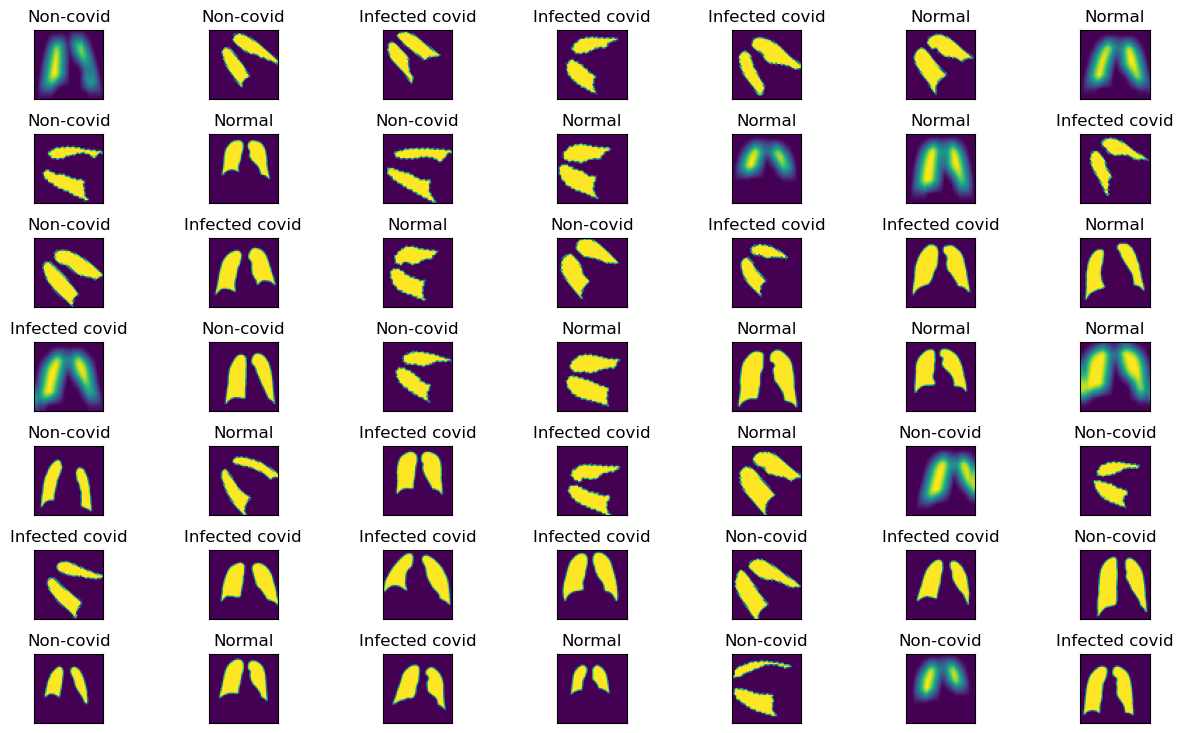

In [26]:
plt.figure(1, figsize=(15, 9))
n = 0
for i in range(49):
    n += 1
    r = np.random.randint(0, lungs_images.shape[0], 1)
    plt.subplot(7, 7, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(lungs_images[r[0]])
    if labels[r[0]] == 1:
        plt.title('Infected covid')
    elif labels[r[0]] == 2:
        plt.title('Non-covid')
    else:
        plt.title('Normal')
    plt.xticks([])
    plt.yticks([])

plt.show()


In [27]:
#Shuffling the images and labels
m = np.arange(lungs_images.shape[0])
np.random.shuffle(m)
lungs_images = lungs_images[m]
labels = labels[m]

In [28]:
#Standardizing
lungs_images = lungs_images.astype(np.float32)
labels = labels.astype(np.int32)
lungs_images = lungs_images/255

In [29]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(lungs_images , labels , 
                                            test_size = 0.2 ,
                                            random_state = 42) 
#train_x and x will be the training and test sets of lungs_images, respectively.
#train_y and y will be the corresponding training and test sets of labels.

val_x , test_x , val_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 42)

#val_x and test_x will be the validation and test sets of x, respectively.
#val_y and test_y will be the corresponding validation and test sets of y.


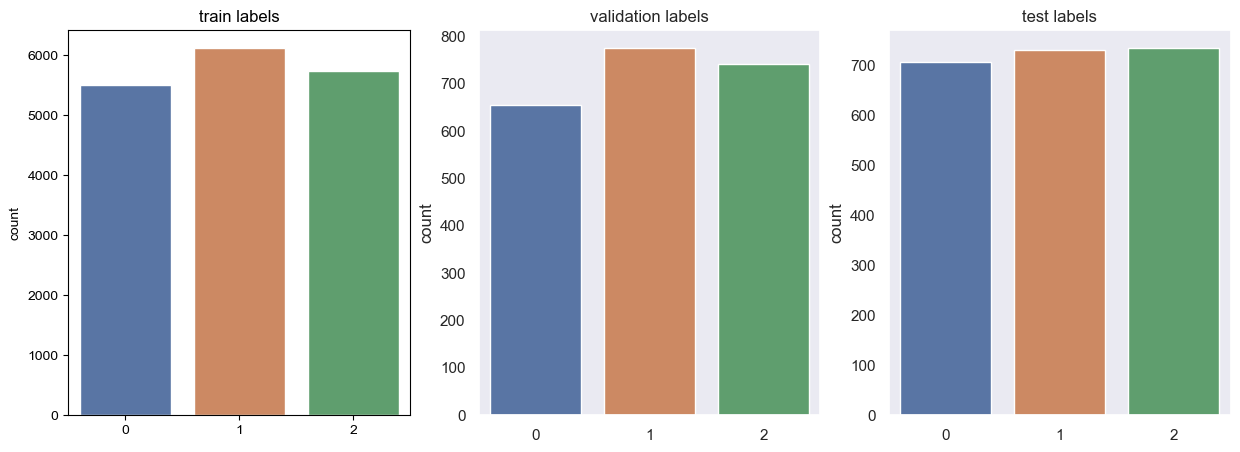

In [30]:
plt.figure(1 , figsize = (15 ,5))
n = 0 
for f , j in zip([train_y , val_y , test_y] , ['train labels','validation labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.set_theme(style="dark")
    sns.countplot(x = f )
    plt.title(j)
plt.show()

In [31]:
print('train data shape {} ,validation data shape {} , test data shape {}'.format(train_x.shape,
                                                                           val_x.shape ,
                                                                           test_x.shape))

train data shape (17334, 50, 50) ,validation data shape (2167, 50, 50) , test data shape (2167, 50, 50)
